In [1]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import tensorflow
import parquet
import seaborn as sns

In [2]:
#!pip install pandasql
#!pip install tensorflow
#!pip install parquet
#!pip install Scikit-learn

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# DATA PREPARATION

# START TRAINING FROM HERE

In [4]:
df = pd.read_parquet('kelusanka_2022_after imputing_missing.parquet')
len(df)

4745

In [5]:
hourly_train,hourly_test = df[['DEMAND']].iloc[:4342],df[['DEMAND']].iloc[4342:]
#hourly_train,hourly_test
print(len(hourly_train),len(hourly_test))

4342 403


In [6]:
scaler = MinMaxScaler()
scaler.fit(hourly_train)
scaled_hourly_train = scaler.transform(hourly_train)
scaled_hourly_test = scaler.transform(hourly_test)
len(scaled_hourly_train)

4342

In [7]:
scaled_hourly_train

array([[0.11637931],
       [0.29741379],
       [0.09051724],
       ...,
       [0.56465517],
       [0.60775862],
       [0.06465517]])

In [8]:
n_input_hourly = 4
n_features = 1
def train_data_hourly(a,n):
    R,s=[],[]
    for i in range(len(scaled_hourly_train)):
        end_ix = i + n_input_hourly
        if end_ix > len(scaled_hourly_train)-1:
            break
        seq_r,seq_s = scaled_hourly_train[i:end_ix],scaled_hourly_train[end_ix]
        R.append(seq_r)
        s.append(seq_s)
    return np.array(R),np.array(s)
R,s = train_data_hourly(scaled_hourly_train,n_input_hourly)
R_train,R_val,s_train,s_val =train_test_split(R,s,test_size=0.15,shuffle = False,random_state = 0)

#demo of input and output sequence
X,Y =train_generator[0]
X,Y,X.shape

In [76]:
#from keras import regularizers
### defining hourly model
model1 =Sequential()
model1.add(LSTM(128,activation ='relu',input_shape=(n_input_hourly,n_features),return_sequences=True,kernel_regularizer=regularizers.l1(0.01)))#return sequence when more than one layer
#return sequence is used for first two layers to ensure that the output of each layer is fed into the next layer
#in the sequence ,kernel_regularizer=regularizers.l1(0.01)
##model1.add(Dropout(0.2))
#Droupout regularization is used for preventing overfitting in LSTM layers
model1.add(LSTM(64,return_sequences=True))
##model1.add(Dropout(0.2))
model1.add(LSTM(16))
model1.add(Dense(1))

In [77]:
#model compiling
model1.compile(optimizer = 'adam',loss = 'mse')
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 4, 128)            66560     
                                                                 
 lstm_13 (LSTM)              (None, 4, 64)             49408     
                                                                 
 lstm_14 (LSTM)              (None, 16)                5184      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 121,169
Trainable params: 121,169
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0324 - val_loss: 0.0359
Epoch 2/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0324 - val_loss: 0.0349
Epoch 3/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0324 - val_loss: 0.0372
Epoch 4/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0325 - val_loss: 0.0358
Epoch 5/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0324 - val_loss: 0.0362
Epoch 6/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0323 - val_loss: 0.0355
Epoch 7/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0323 - val_loss: 0.0364
Epoch 8/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0324 - val_loss: 0.0388
Epoch 9/100
116/116 [==============================] - 1s 7ms/step - loss: 0.0324 - val_loss: 0.0355
Epoch 10/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0323 - val_lo

116/116 [==============================] - 1s 6ms/step - loss: 0.0323 - val_loss: 0.0354
Epoch 82/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0323 - val_loss: 0.0366
Epoch 83/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0323 - val_loss: 0.0361
Epoch 84/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0323 - val_loss: 0.0356
Epoch 85/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0324 - val_loss: 0.0363
Epoch 86/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0323 - val_loss: 0.0358
Epoch 87/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0322 - val_loss: 0.0378
Epoch 88/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0323 - val_loss: 0.0359
Epoch 89/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0323 - val_loss: 0.0361
Epoch 90/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0323 - val_loss: 

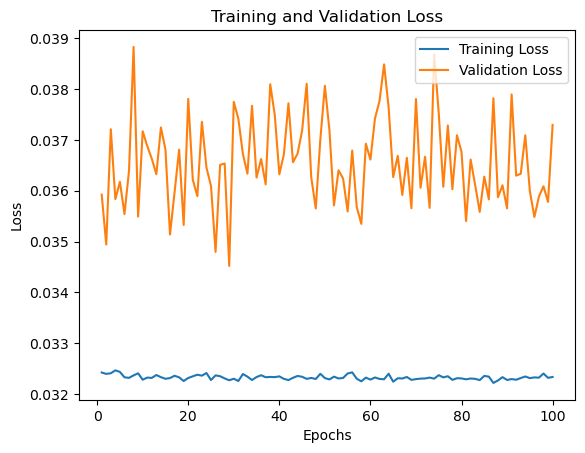

In [86]:
# Defining the early stopping callback
##early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min')
#patience :the number of epochs to wait before stopping the training if no improvement is observed.
#mode: direction of improvement set to min side
# Train the model with the early stopping callback
history = model1.fit(R_train,s_train,validation_data = (R_val,s_val) ,epochs= 100,batch_size = 32 )# removed batch_size =16,validation_data=(val_generator),,callbacks=[early_stop]

train_loss =history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 101)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [74]:
#model1.save('kelu_2022.h5')

In [73]:
model1 = load_model('kelu_2022_best.h5')
#27 mape 120 epoch ,n_input_hourly = 4

In [150]:
model1.evaluate(train_generator,verbose = 2)

4338/4338 - 5s - loss: 0.0077 - 5s/epoch - 1ms/step


0.007744395639747381

# HOURLY TESTING BY PREDICTION

In [87]:
#output test
last_train_batch = scaled_hourly_train[-n_input_hourly:]
last_train_batch = last_train_batch.reshape(1,n_input_hourly,n_features)
last_train_batch,model1.predict(last_train_batch)

1/1 [==============================] - 0s 18ms/step


(array([[[0.48706897],
         [0.56465517],
         [0.60775862],
         [0.06465517]]]),
 array([[0.25592384]], dtype=float32))

In [88]:
scaled_hourly_test[0]

array([0.26293103])

In [89]:
hourly_predictions = []
first_eval_batch = scaled_hourly_train[-n_input_hourly:]
current_batch = first_eval_batch.reshape(1,n_input_hourly,n_features)

for i in range(len(scaled_hourly_test)):
    # get the prediction value for first batch
    current_pred = model1.predict(current_batch)[0]
    
    # appending the prediction into array
    hourly_predictions.append(current_pred)
    
    #updating the batch with the predicted value and removing the first element
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)
    
hourly_predictions

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


[array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 array([0.25592384], dtype=float32),
 

In [90]:
scaled_hourly_test1 = scaler.inverse_transform(scaled_hourly_test)
scaled_hourly_test2 = pd.DataFrame(scaled_hourly_test1)
true_predictions = scaler.inverse_transform(hourly_predictions)
scaled_hourly_test2['predictions'] = np.round(true_predictions)
scaled_hourly_test2

,0,predictions
0,62.0,60.0
1,162.0,60.0
2,63.0,60.0
3,26.0,60.0
4,59.0,60.0
...,...,...
398,75.0,60.0
399,90.0,60.0
400,106.0,60.0
401,138.0,60.0


<AxesSubplot:>

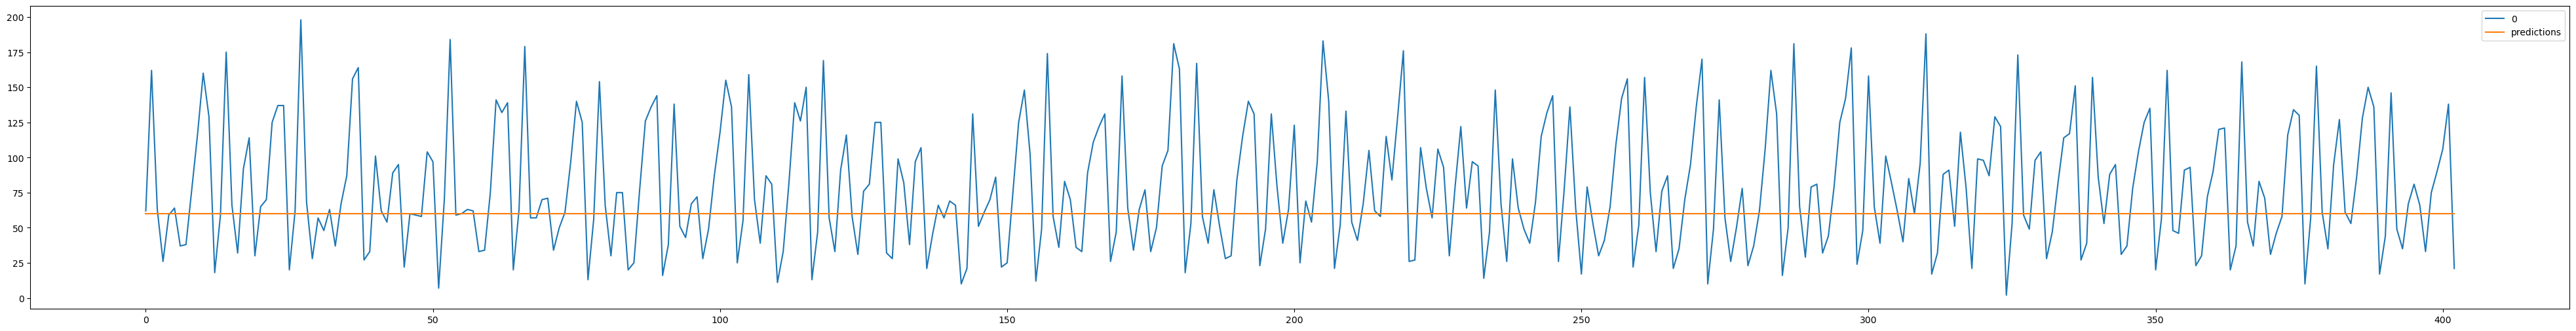

In [91]:
scaled_hourly_test2.plot(kind = 'line',figsize =(50,6))

In [92]:
rmse = sqrt(mean_squared_error(scaled_hourly_test2[0],scaled_hourly_test2['predictions']))
print('rmse:',rmse)
#MAPE should be less than 10
mape = (1/len(scaled_hourly_test2))*np.sum(np.abs((scaled_hourly_test2[0]-scaled_hourly_test2['predictions'])/scaled_hourly_test2[0]))*100
print('mape:',mape)
wmape = np.sum((scaled_hourly_test2[0]/np.sum(scaled_hourly_test2[0]))*(np.abs((scaled_hourly_test2[0]-scaled_hourly_test2['predictions'])/scaled_hourly_test2[0])))*100
print('wmape:',wmape)

rmse: 48.180594922096454
mape: 69.03737919587005
wmape: 47.253583661042754


In [68]:
#model1.save('kelu_2022_best.h5')
##till now 25  mape 120 epoch n_input_hourly = 4,batch_size = 32

# DAILY PERIODICITY

In [25]:
n_input_daily = 7
def daily_train_data(a,n):
    X,y=[],[]
    for i in range(len(a)-13):
        end_ix = i +13*n
        if end_ix > len(a)-1:
            break
        seq_x,seq_y = [a[i+13*j] for j in range(n)],a[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)
X,y = daily_train_data(scaled_hourly_train,n_input_daily)

In [26]:
X[0],y[0]

(array([[0.11637931],
        [0.08189655],
        [0.44396552],
        [0.34913793],
        [0.38362069],
        [0.43103448],
        [0.4137931 ]]),
 array([0.0387931]))

In [27]:
scaled_hourly_train[39]

array([0.34913793])

In [28]:
len(X),len(y),X.shape

(4251, 4251, (4251, 7, 1))

In [52]:
X_train,X_val,y_train,y_val =train_test_split(X,y,test_size=0.2,shuffle = False,random_state = 0)
len(X_train),len(X_val),len(y_train),len(y_val)

(3400, 851, 3400, 851)

In [33]:
n_features =1
#X = X.reshape(X.shape[0],X.shape[1],n_features)
#X.shape

In [53]:
### defining daily model
model2 =Sequential()
model2.add(LSTM(128,activation ='relu',input_shape=(n_input_daily,n_features),return_sequences=True))#return sequence when more than one layer
##model2.add(Dropout(0.2))
model2.add(LSTM(64,return_sequences=True))
##model2.add(Dropout(0.2))
model2.add(LSTM(16))
model2.add(Dense(1))

In [54]:
#model compiling
model2.compile(optimizer = 'adam',loss = 'mse')
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 7, 128)            66560     
                                                                 
 lstm_16 (LSTM)              (None, 7, 64)             49408     
                                                                 
 lstm_17 (LSTM)              (None, 16)                5184      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 121,169
Trainable params: 121,169
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
107/107 [==============================] - 1s 8ms/step - loss: 0.0057 - val_loss: 0.0085
Epoch 2/100
107/107 [==============================] - 1s 8ms/step - loss: 0.0058 - val_loss: 0.0082
Epoch 3/100
107/107 [==============================] - 1s 8ms/step - loss: 0.0056 - val_loss: 0.0081
Epoch 4/100
107/107 [==============================] - 1s 8ms/step - loss: 0.0056 - val_loss: 0.0081
Epoch 5/100
107/107 [==============================] - 1s 8ms/step - loss: 0.0056 - val_loss: 0.0082
Epoch 6/100
107/107 [==============================] - 1s 8ms/step - loss: 0.0056 - val_loss: 0.0082
Epoch 7/100
107/107 [==============================] - 1s 8ms/step - loss: 0.0057 - val_loss: 0.0083
Epoch 8/100
107/107 [==============================] - 1s 8ms/step - loss: 0.0058 - val_loss: 0.0083
Epoch 9/100
107/107 [==============================] - 1s 9ms/step - loss: 0.0056 - val_loss: 0.0084
Epoch 10/100
107/107 [==============================] - 1s 9ms/step - loss: 0.0056 - val_lo

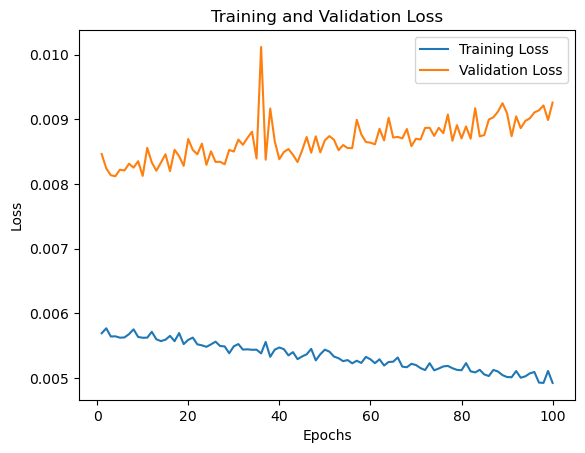

In [57]:
model2.fit(X_train,y_train,validation_data = (X_val,y_val),epochs =100,batch_size = 32)#250

In [354]:
#model2.save('daily_training.h5')

In [370]:
model2 = load_model('daily_training.h5')
#24% mape 230 epochs,n_input_daily=7,batch_size = 100

# Daily periodicity prediction

In [371]:
first_prediction_set = scaled_hourly_train[len(X):]
first_prediction_set

array([[0.36637931],
       [0.71982759],
       [0.28017241],
       [0.15517241],
       [0.22844828],
       [0.32758621],
       [0.06896552],
       [0.20258621],
       [0.34051724],
       [0.54310345],
       [0.52586207],
       [0.52155172],
       [0.06034483],
       [0.23706897],
       [0.75862069],
       [0.34913793],
       [0.17241379],
       [0.30603448],
       [0.30603448],
       [0.15948276],
       [0.12068966],
       [0.28017241],
       [0.40517241],
       [0.54310345],
       [0.6637931 ],
       [0.09913793],
       [0.21982759],
       [0.68534483],
       [0.19827586],
       [0.125     ],
       [0.22413793],
       [0.43534483],
       [0.21551724],
       [0.13362069],
       [0.26293103],
       [0.51293103],
       [0.59913793],
       [0.625     ],
       [0.10775862],
       [0.18965517],
       [0.43534483],
       [0.40948276],
       [0.1637931 ],
       [0.42672414],
       [0.2887931 ],
       [0.12931034],
       [0.22844828],
       [0.262

In [372]:
def training_batch(a):
    first_predict_batch = []
    for i in range(n_input_daily):
        first_predict_batch.append(list(a[13*i]))
    first_predict_batch =np.array(first_predict_batch)
    return first_predict_batch

In [373]:
daily_predictions = []
train_batch = training_batch(first_prediction_set)
first_eval_batch1 = train_batch
current_batch = first_eval_batch1.reshape(1,n_input_daily,n_features)

for i in range(len(scaled_hourly_test)):
    # get the prediction value for first batch
    current_pred = model2.predict(current_batch)[0]
    
    # appending the prediction into array
    daily_predictions.append(current_pred)
    #updating the batch with the predicted value and removing the first element
    first_prediction_set = np.append(first_prediction_set[1:],current_pred)
    updated_prediction_set = first_prediction_set[:, np.newaxis]
    train_batch = training_batch(updated_prediction_set)
    first_eval_batch1 = train_batch
    current_batch = first_eval_batch1.reshape(1,n_input_daily,n_features)
    
daily_predictions

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


[array([0.2619832], dtype=float32),
 array([0.6884013], dtype=float32),
 array([0.32476512], dtype=float32),
 array([0.15966782], dtype=float32),
 array([0.35852942], dtype=float32),
 array([0.3061906], dtype=float32),
 array([0.11442338], dtype=float32),
 array([0.1702176], dtype=float32),
 array([0.29223683], dtype=float32),
 array([0.5083883], dtype=float32),
 array([0.56504285], dtype=float32),
 array([0.597691], dtype=float32),
 array([0.0661554], dtype=float32),
 array([0.23467255], dtype=float32),
 array([0.68277735], dtype=float32),
 array([0.3179618], dtype=float32),
 array([0.16005874], dtype=float32),
 array([0.37386885], dtype=float32),
 array([0.298053], dtype=float32),
 array([0.13753518], dtype=float32),
 array([0.15492311], dtype=float32),
 array([0.27810568], dtype=float32),
 array([0.45310798], dtype=float32),
 array([0.5681071], dtype=float32),
 array([0.59508556], dtype=float32),
 array([0.07076549], dtype=float32),
 array([0.22535378], dtype=float32),
 array([0.680

In [374]:
scaled_daily_test1 = scaler.inverse_transform(scaled_hourly_test)
scaled_daily_test2 = pd.DataFrame(scaled_daily_test1)
true_predictions = scaler.inverse_transform(daily_predictions)
scaled_daily_test2['predictions'] = np.round(true_predictions)
scaled_daily_test2

,0,predictions
0,62.0,62.0
1,162.0,161.0
2,63.0,76.0
3,26.0,38.0
4,59.0,84.0
...,...,...
398,75.0,67.0
399,90.0,131.0
400,106.0,133.0
401,138.0,130.0


<AxesSubplot:>

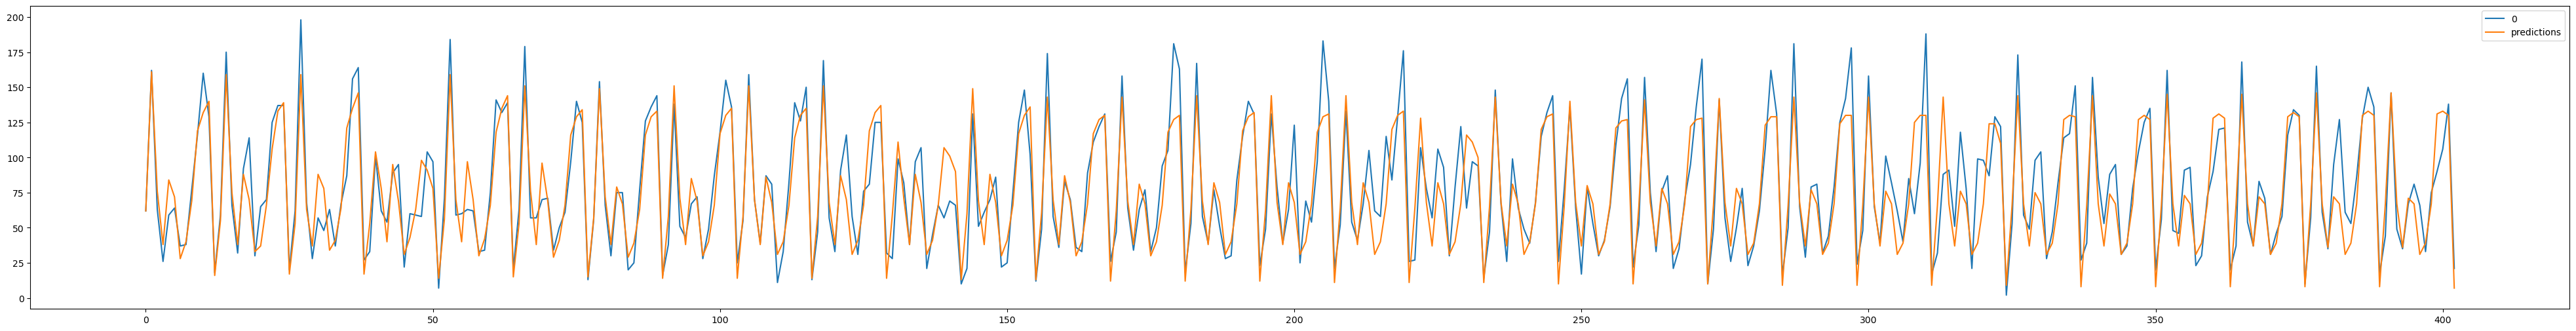

In [375]:
scaled_daily_test2.plot(kind = 'line',figsize =(50,6))

In [376]:
rmse = sqrt(mean_squared_error(scaled_daily_test2[0],scaled_daily_test2['predictions']))
print('rmse:',rmse)
#MAPE should be less than 10
mape = (1/len(scaled_daily_test2))*np.sum(np.abs((scaled_daily_test2[0]-scaled_daily_test2['predictions'])/scaled_daily_test2[0]))*100
print('mape:',mape)
wmape = np.sum((scaled_daily_test2[0]/np.sum(scaled_daily_test2[0]))*(np.abs((scaled_daily_test2[0]-scaled_daily_test2['predictions'])/scaled_daily_test2[0])))*100
print('wmape:',wmape)

rmse: 19.242606778520273
mape: 24.008058762849018
wmape: 18.55258150450336


# WEEKLY TREND CHARECTERISTICS

In [378]:
n_input_weekly = 6
def weekly_train_data(a,n):
    U,v=[],[]
    for i in range(len(a)-91):
        end_ix = i +91*n
        if end_ix > len(a)-1:
            break
        seq_u,seq_v = [a[i+91*j] for j in range(n)],a[end_ix]
        U.append(seq_u)
        v.append(seq_v)
    return np.array(U),np.array(v)
U,v = weekly_train_data(scaled_hourly_train,n_input_weekly)

In [379]:
U[0],v[0]

(array([[0.11637931],
        [0.0387931 ],
        [0.13362069],
        [0.37068966],
        [0.32758621],
        [0.40086207]]),
 array([0.28448276]))

In [380]:
n_features =1
#X = X.reshape(X.shape[0],X.shape[1],n_features)
#X.shape

In [381]:
### defining daily model
model3 =Sequential()
model3.add(LSTM(128,activation ='relu',input_shape=(n_input_weekly,n_features),return_sequences=True))#return sequence when more than one layer
##model3.add(Dropout(0.2))
model3.add(LSTM(64,return_sequences=True))
##model3.add(Dropout(0.2))
model3.add(LSTM(16))
model3.add(Dense(1))

In [59]:
#model compiling
model3.compile(optimizer = 'adam',loss = 'mse')
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 6, 128)            66560     
                                                                 
 lstm_10 (LSTM)              (None, 6, 64)             49408     
                                                                 
 lstm_11 (LSTM)              (None, 16)                5184      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 121,169
Trainable params: 121,169
Non-trainable params: 0
_________________________________________________________________


In [60]:
model3.fit(U,v,epochs = 100,batch_size = 50)

Epoch 1/100
76/76 [==============================] - 4s 12ms/step - loss: 0.0184
Epoch 2/100
76/76 [==============================] - 1s 12ms/step - loss: 0.0074
Epoch 3/100
76/76 [==============================] - 1s 13ms/step - loss: 0.0071
Epoch 4/100
76/76 [==============================] - 1s 13ms/step - loss: 0.0070
Epoch 5/100
76/76 [==============================] - 1s 13ms/step - loss: 0.0069
Epoch 6/100
76/76 [==============================] - 1s 13ms/step - loss: 0.0069
Epoch 7/100
76/76 [==============================] - 1s 13ms/step - loss: 0.0067
Epoch 8/100
76/76 [==============================] - 1s 13ms/step - loss: 0.0066
Epoch 9/100
76/76 [==============================] - 1s 12ms/step - loss: 0.0066
Epoch 10/100
76/76 [==============================] - 1s 12ms/step - loss: 0.0067
Epoch 11/100
76/76 [==============================] - 1s 12ms/step - loss: 0.0065
Epoch 12/100
76/76 [==============================] - 1s 12ms/step - loss: 0.0065
Epoch 13/100
76/76 [=====

In [ ]:
#model3.save('weekly_training.h5')

In [382]:
model3 = load_model('weekly_training.h5')
#19% mape, epochs 100,batch_size= 50, n_input_weekly=6,rmse 17

In [33]:
len(U),len(v),U.shape

(3796, 3796, (3796, 6, 1))

# WEEKLY PREDICTION

In [19]:
weekly_prediction_set = scaled_hourly_train[len(U):]
weekly_prediction_set

array([[0.25431034],
       [0.59482759],
       [0.20689655],
       [0.09051724],
       [0.21982759],
       [0.27155172],
       [0.17241379],
       [0.13362069],
       [0.27586207],
       [0.4612069 ],
       [0.4137931 ],
       [0.48706897],
       [0.0862069 ],
       [0.32758621],
       [0.6637931 ],
       [0.28017241],
       [0.06465517],
       [0.25862069],
       [0.34482759],
       [0.15086207],
       [0.20689655],
       [0.23275862],
       [0.40517241],
       [0.57327586],
       [0.55603448],
       [0.07327586],
       [0.24568966],
       [0.61637931],
       [0.28448276],
       [0.20258621],
       [0.19827586],
       [0.28017241],
       [0.24137931],
       [0.23275862],
       [0.35344828],
       [0.36206897],
       [0.47844828],
       [0.44827586],
       [0.19396552],
       [0.11637931],
       [0.4612069 ],
       [0.28017241],
       [0.15086207],
       [0.45258621],
       [0.43965517],
       [0.15948276],
       [0.17241379],
       [0.452

In [383]:
def training_batch_weekly(a):
    first_predict_batch = []
    for i in range(n_input_weekly):
        first_predict_batch.append(list(a[91*i]))
    first_predict_batch =np.array(first_predict_batch)
    return first_predict_batch

In [384]:
weekly_predictions = []
train_batch = training_batch_weekly(weekly_prediction_set)
first_eval_batch1 = train_batch
current_batch = first_eval_batch1.reshape(1,n_input_weekly,n_features)

for i in range(len(scaled_hourly_test)):
    # get the prediction value for first batch
    current_pred = model3.predict(current_batch)[0]
    
    # appending the prediction into array
    weekly_predictions.append(current_pred)
    #updating the batch with the predicted value and removing the first element
    weekly_prediction_set = np.append(weekly_prediction_set[1:],current_pred)
    updated_prediction_set = weekly_prediction_set[:, np.newaxis]
    train_batch = training_batch_weekly(updated_prediction_set)
    first_eval_batch1 = train_batch
    current_batch = first_eval_batch1.reshape(1,n_input_weekly,n_features)
    
weekly_predictions

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


[array([0.31372035], dtype=float32),
 array([0.6310724], dtype=float32),
 array([0.26985714], dtype=float32),
 array([0.13662817], dtype=float32),
 array([0.2612401], dtype=float32),
 array([0.29092255], dtype=float32),
 array([0.11190017], dtype=float32),
 array([0.15743068], dtype=float32),
 array([0.32563627], dtype=float32),
 array([0.5072081], dtype=float32),
 array([0.5345473], dtype=float32),
 array([0.5209521], dtype=float32),
 array([0.06140829], dtype=float32),
 array([0.24651748], dtype=float32),
 array([0.65420294], dtype=float32),
 array([0.28833386], dtype=float32),
 array([0.13827927], dtype=float32),
 array([0.27999035], dtype=float32),
 array([0.3737433], dtype=float32),
 array([0.1268672], dtype=float32),
 array([0.16564949], dtype=float32),
 array([0.2709236], dtype=float32),
 array([0.4386003], dtype=float32),
 array([0.5315904], dtype=float32),
 array([0.56327796], dtype=float32),
 array([0.07535321], dtype=float32),
 array([0.24161716], dtype=float32),
 array([0.6

In [385]:
scaled_weekly_test1 = scaler.inverse_transform(scaled_hourly_test)
scaled_weekly_test2 = pd.DataFrame(scaled_weekly_test1)
true_predictions = scaler.inverse_transform(weekly_predictions)
scaled_weekly_test2['predictions'] = np.round(true_predictions)
scaled_weekly_test2

,0,predictions
0,62.0,74.0
1,162.0,147.0
2,63.0,64.0
3,26.0,33.0
4,59.0,62.0
...,...,...
398,75.0,64.0
399,90.0,94.0
400,106.0,129.0
401,138.0,126.0


In [386]:
scaled_weekly_test2 = scaled_weekly_test2.rename(columns = {0:'actuals'})
scaled_weekly_test2

,actuals,predictions
0,62.0,74.0
1,162.0,147.0
2,63.0,64.0
3,26.0,33.0
4,59.0,62.0
...,...,...
398,75.0,64.0
399,90.0,94.0
400,106.0,129.0
401,138.0,126.0


<AxesSubplot:>

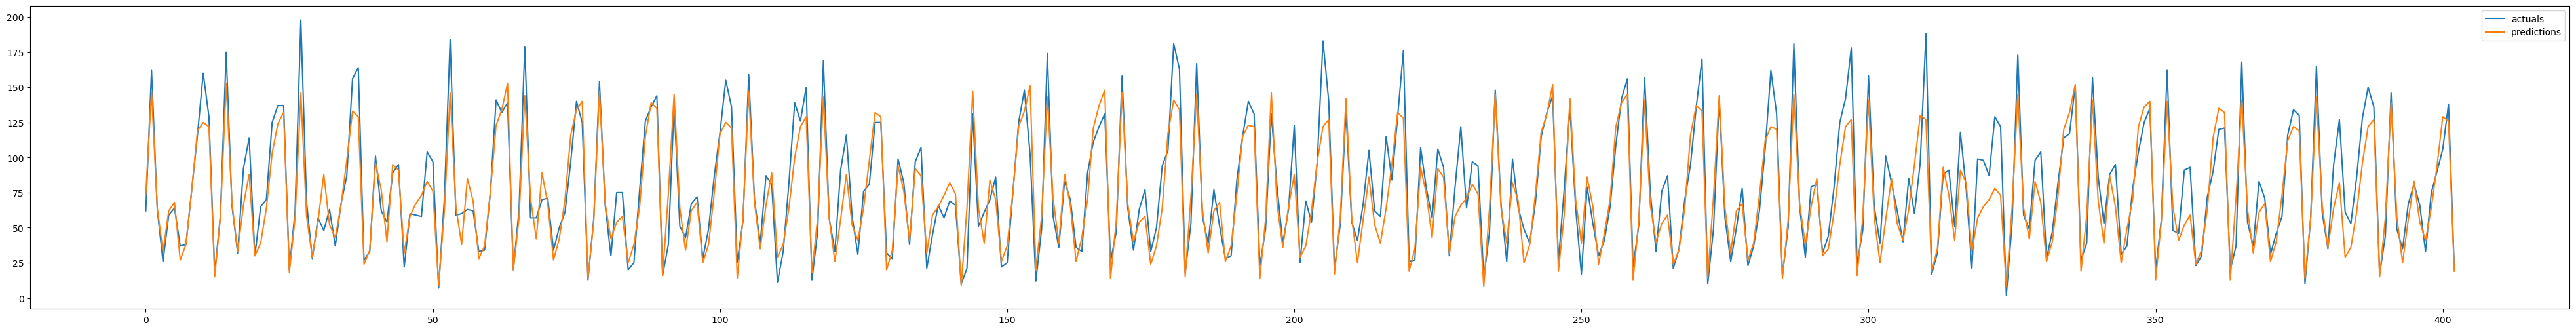

In [387]:
scaled_weekly_test2.plot(kind = 'line',figsize =(50,6))

In [388]:
rmse = sqrt(mean_squared_error(scaled_weekly_test2['actuals'],scaled_weekly_test2['predictions']))
print('rmse:',rmse)
#MAPE should be less than 10
mape = (1/len(scaled_weekly_test2))*np.sum(np.abs((scaled_weekly_test2['actuals']-scaled_weekly_test2['predictions'])/scaled_weekly_test2['actuals']))*100
print('mape:',mape)
wmape = np.sum((scaled_weekly_test2['actuals']/np.sum(scaled_weekly_test2['actuals']))*(np.abs((scaled_weekly_test2['actuals']-scaled_weekly_test2['predictions'])/scaled_weekly_test2['actuals'])))*100
print('wmape:',wmape)

rmse: 17.402546803147292
mape: 19.807361863221406
wmape: 16.497526322466065


In [67]:
#model3.save('weekly_training.h5')

In [389]:
scaled_hourly_test2 = scaled_hourly_test2.rename(columns = {0:'actuals'})
scaled_daily_test2 = scaled_daily_test2.rename(columns = {0:'actuals'})
scaled_weekly_test2 = scaled_weekly_test2.rename(columns = {0:'actuals'})

In [390]:
scaled_hourly_test2.to_parquet('predictions and actuals_hourly.parquet')
scaled_daily_test2.to_parquet('predictions and actuals_daily.parquet')
scaled_weekly_test2.to_parquet('predictions and actuals-weekly.parquet')

# FUSING BY STACKING
## USING NEURAL NETWORKS

In [5]:
hourly_preds = pd.read_parquet('predictions and actuals_hourly.parquet')
daily_preds = pd.read_parquet('predictions and actuals_daily.parquet')
weekly_preds = pd.read_parquet('predictions and actuals-weekly.parquet')

In [8]:
mean_squared_error(hourly_preds['actuals'],hourly_preds['predictions'])

23.956122007489384

In [392]:
##using performance weightage in weighted average method
ensemble_predictions = (0.15*hourly_preds['predictions'] + 0.15*daily_preds['predictions'] + 0.7*weekly_preds['predictions'])

In [393]:
rmse = sqrt(mean_squared_error(scaled_weekly_test2['actuals'],ensemble_predictions))
print('rmse:',rmse)
#MAPE should be less than 10
mape = (1/len(scaled_weekly_test2))*np.sum(np.abs((scaled_weekly_test2['actuals']-ensemble_predictions)/scaled_weekly_test2['actuals']))*100
print('mape:',mape)
wmape = np.sum((scaled_weekly_test2['actuals']/np.sum(scaled_weekly_test2['actuals']))*(np.abs((scaled_weekly_test2['actuals']-ensemble_predictions)/scaled_weekly_test2['actuals'])))*100
print('wmape:',wmape)

rmse: 17.51846951630046
mape: 20.34671794942446
wmape: 16.720474438665484


In [21]:
X_train,X_val = hourly_train[['DEMAND']].iloc[:3952],hourly_train[['DEMAND']].iloc[3952:]

In [22]:
X_train,X_val = scaler.transform(X_train),scaler.transform(X_val)

In [23]:
len(X_train)-65

3887

In [24]:
val_predictions = []
first_eval_batch = X_train[-n_input_hourly:]
current_batch = first_eval_batch.reshape(1,n_input_hourly,n_features)

for i in range(len(X_val)):
    # get the prediction value for first batch
    current_pred = model1.predict(current_batch)[0]
    
    # appending the prediction into array
    val_predictions.append(current_pred)
    
    #updating the batch with the predicted value and removing the first element
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)
    
val_predictions

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


[array([0.22974025], dtype=float32),
 array([0.6383885], dtype=float32),
 array([0.2704898], dtype=float32),
 array([0.14375342], dtype=float32),
 array([0.26856467], dtype=float32),
 array([0.29159063], dtype=float32),
 array([0.10659018], dtype=float32),
 array([0.12308893], dtype=float32),
 array([0.31631827], dtype=float32),
 array([0.41915324], dtype=float32),
 array([0.47010842], dtype=float32),
 array([0.45887452], dtype=float32),
 array([0.05946928], dtype=float32),
 array([0.26231432], dtype=float32),
 array([0.62959874], dtype=float32),
 array([0.23538642], dtype=float32),
 array([0.12974082], dtype=float32),
 array([0.2555205], dtype=float32),
 array([0.26951456], dtype=float32),
 array([0.13408953], dtype=float32),
 array([0.12894036], dtype=float32),
 array([0.297363], dtype=float32),
 array([0.439523], dtype=float32),
 array([0.48179156], dtype=float32),
 array([0.45954245], dtype=float32),
 array([0.05761021], dtype=float32),
 array([0.27085006], dtype=float32),
 array([

In [25]:
val_test1 = scaler.inverse_transform(X_val)
val_test2 = pd.DataFrame(val_test1)
true_predictions = scaler.inverse_transform(val_predictions)
val_test2['val_predictions'] = np.round(true_predictions)
val_test2

,0,val_predictions
0,48.0,54.0
1,144.0,149.0
2,57.0,64.0
3,42.0,34.0
4,59.0,63.0
...,...,...
385,45.0,66.0
386,114.0,101.0
387,132.0,110.0
388,142.0,107.0


In [26]:
rmse = sqrt(mean_squared_error(val_test2[0],val_test2['val_predictions']))
print('rmse:',rmse)
#MAPE should be less than 10
mape = (1/len(val_test2))*np.sum(np.abs((val_test2[0]-val_test2['val_predictions'])/val_test2[0]))*100
print('mape:',mape)
wmape = np.sum((val_test2[0]/np.sum(val_test2[0]))*(np.abs((val_test2[0]-val_test2['val_predictions'])/val_test2[0])))*100
print('wmape:',wmape)

rmse: 23.554954838332794
mape: 25.17834931626412
wmape: 22.002715546503733


In [396]:
val_prediction_set = X_train[len(X_train)-91:]
val_prediction_set

array([[0.18103448],
       [0.375     ],
       [0.23275862],
       [0.29741379],
       [0.32758621],
       [0.22413793],
       [0.12068966],
       [0.10344828],
       [0.20258621],
       [0.16810345],
       [0.31465517],
       [0.23275862],
       [0.02586207],
       [0.09482759],
       [0.49568966],
       [0.32758621],
       [0.23275862],
       [0.3362069 ],
       [0.24568966],
       [0.13793103],
       [0.20258621],
       [0.30603448],
       [0.37068966],
       [0.52586207],
       [0.42672414],
       [0.09051724],
       [0.34482759],
       [0.55172414],
       [0.32758621],
       [0.19396552],
       [0.30172414],
       [0.22844828],
       [0.09051724],
       [0.15517241],
       [0.34482759],
       [0.54310345],
       [0.62931034],
       [0.40948276],
       [0.06034483],
       [0.29310345],
       [0.70689655],
       [0.27155172],
       [0.09913793],
       [0.37068966],
       [0.32758621],
       [0.12931034],
       [0.18965517],
       [0.387

In [397]:
daily_val_predictions = []
train_batch = training_batch(val_prediction_set)
first_eval_batch1 = train_batch
current_batch = first_eval_batch1.reshape(1,n_input_daily,n_features)

for i in range(len(X_val)):
    # get the prediction value for first batch
    current_pred = model2.predict(current_batch)[0]
    
    # appending the prediction into array
    daily_val_predictions.append(current_pred)
    #updating the batch with the predicted value and removing the first element
    val_prediction_set = np.append(val_prediction_set[1:],current_pred)
    updated_prediction_set = val_prediction_set[:, np.newaxis]
    train_batch = training_batch(updated_prediction_set)
    first_eval_batch1 = train_batch
    current_batch = first_eval_batch1.reshape(1,n_input_daily,n_features)
    
daily_val_predictions

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


[array([0.24389413], dtype=float32),
 array([0.50141144], dtype=float32),
 array([0.26476538], dtype=float32),
 array([0.18687305], dtype=float32),
 array([0.29890645], dtype=float32),
 array([0.29279685], dtype=float32),
 array([0.12949596], dtype=float32),
 array([0.19818538], dtype=float32),
 array([0.27244478], dtype=float32),
 array([0.296848], dtype=float32),
 array([0.43968123], dtype=float32),
 array([0.4246929], dtype=float32),
 array([0.07132547], dtype=float32),
 array([0.23314613], dtype=float32),
 array([0.5906925], dtype=float32),
 array([0.28490472], dtype=float32),
 array([0.17401484], dtype=float32),
 array([0.29539338], dtype=float32),
 array([0.28880352], dtype=float32),
 array([0.13507259], dtype=float32),
 array([0.19789043], dtype=float32),
 array([0.29188615], dtype=float32),
 array([0.4354434], dtype=float32),
 array([0.55045474], dtype=float32),
 array([0.47404024], dtype=float32),
 array([0.08240147], dtype=float32),
 array([0.26635954], dtype=float32),
 array

In [398]:
val_daily_test1 = scaler.inverse_transform(X_val)
val_daily_test2 = pd.DataFrame(val_daily_test1)
true_predictions = scaler.inverse_transform(daily_val_predictions)
val_daily_test2['val_predictions'] = np.round(true_predictions)
val_daily_test2

,0,val_predictions
0,48.0,58.0
1,144.0,117.0
2,57.0,62.0
3,42.0,44.0
4,59.0,70.0
...,...,...
385,45.0,67.0
386,114.0,102.0
387,132.0,130.0
388,142.0,109.0


In [399]:
rmse = sqrt(mean_squared_error(val_daily_test2[0],val_daily_test2['val_predictions']))
print('rmse:',rmse)
#MAPE should be less than 10
mape = (1/len(val_daily_test2))*np.sum(np.abs((val_daily_test2[0]-val_daily_test2['val_predictions'])/val_daily_test2[0]))*100
print('mape:',mape)
wmape = np.sum((val_daily_test2[0]/np.sum(val_daily_test2[0]))*(np.abs((val_daily_test2[0]-val_daily_test2['val_predictions'])/val_daily_test2[0])))*100
print('wmape:',wmape)

rmse: 21.516898546884565
mape: 25.381824085259492
wmape: 20.247793618465717


In [29]:
val_weekly_pred_set = X_train[len(X_train)-546:]
val_weekly_pred_set

array([[0.22413793],
       [0.63793103],
       [0.27586207],
       [0.14224138],
       [0.28448276],
       [0.18965517],
       [0.12931034],
       [0.13793103],
       [0.23706897],
       [0.44827586],
       [0.4137931 ],
       [0.625     ],
       [0.06034483],
       [0.30172414],
       [0.62068966],
       [0.25      ],
       [0.10344828],
       [0.26724138],
       [0.25862069],
       [0.15517241],
       [0.0862069 ],
       [0.25862069],
       [0.43965517],
       [0.59051724],
       [0.49137931],
       [0.06896552],
       [0.24137931],
       [0.73275862],
       [0.24568966],
       [0.17241379],
       [0.23706897],
       [0.22844828],
       [0.09051724],
       [0.10775862],
       [0.18534483],
       [0.4612069 ],
       [0.46551724],
       [0.62068966],
       [0.04741379],
       [0.26293103],
       [0.625     ],
       [0.26293103],
       [0.14224138],
       [0.25431034],
       [0.28448276],
       [0.13362069],
       [0.11206897],
       [0.301

In [30]:
weekly_val_predictions = []
train_batch = training_batch_weekly(val_weekly_pred_set)
first_eval_batch1 = train_batch
current_batch = first_eval_batch1.reshape(1,n_input_weekly,n_features)

for i in range(len(X_val)):
    # get the prediction value for first batch
    current_pred = model3.predict(current_batch)[0]
    
    # appending the prediction into array
    weekly_val_predictions.append(current_pred)
    #updating the batch with the predicted value and removing the first element
    val_weekly_pred_set = np.append(val_weekly_pred_set[1:],current_pred)
    updated_prediction_set = val_weekly_pred_set[:, np.newaxis]
    train_batch = training_batch_weekly(updated_prediction_set)
    first_eval_batch1 = train_batch
    current_batch = first_eval_batch1.reshape(1,n_input_weekly,n_features)
    
weekly_val_predictions

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


[array([0.22505951], dtype=float32),
 array([0.5790132], dtype=float32),
 array([0.28357762], dtype=float32),
 array([0.21328789], dtype=float32),
 array([0.30763483], dtype=float32),
 array([0.2945573], dtype=float32),
 array([0.1104456], dtype=float32),
 array([0.1586998], dtype=float32),
 array([0.27468824], dtype=float32),
 array([0.3440098], dtype=float32),
 array([0.39320892], dtype=float32),
 array([0.409996], dtype=float32),
 array([0.06017516], dtype=float32),
 array([0.210401], dtype=float32),
 array([0.558224], dtype=float32),
 array([0.28155285], dtype=float32),
 array([0.16466229], dtype=float32),
 array([0.29283273], dtype=float32),
 array([0.27332076], dtype=float32),
 array([0.12215261], dtype=float32),
 array([0.20536773], dtype=float32),
 array([0.32605848], dtype=float32),
 array([0.36357793], dtype=float32),
 array([0.50156176], dtype=float32),
 array([0.49934107], dtype=float32),
 array([0.07727807], dtype=float32),
 array([0.26058108], dtype=float32),
 array([0.59

In [31]:
val_weekly_test1 = scaler.inverse_transform(X_val)
val_weekly_test2 = pd.DataFrame(val_weekly_test1)
true_predictions = scaler.inverse_transform(weekly_val_predictions)
val_weekly_test2['val_predictions'] = np.round(true_predictions)
val_weekly_test2

,0,val_predictions
0,48.0,53.0
1,144.0,135.0
2,57.0,67.0
3,42.0,50.0
4,59.0,72.0
...,...,...
385,45.0,72.0
386,114.0,79.0
387,132.0,111.0
388,142.0,112.0


In [78]:
scaler.transform(true_predictions)

C:\Users\AMRUTH\.spss\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.22505951],
       [0.57901323],
       [0.28357762],
       [0.21328789],
       [0.30763483],
       [0.2945573 ],
       [0.1104456 ],
       [0.1586998 ],
       [0.27468824],
       [0.34400979],
       [0.39320892],
       [0.409996  ],
       [0.06017516],
       [0.210401  ],
       [0.55822402],
       [0.28155285],
       [0.16466229],
       [0.29283273],
       [0.27332076],
       [0.12215261],
       [0.20536773],
       [0.32605848],
       [0.36357793],
       [0.50156176],
       [0.49934107],
       [0.07727807],
       [0.26058108],
       [0.59835207],
       [0.2576105 ],
       [0.15787129],
       [0.27725112],
       [0.25595927],
       [0.09882573],
       [0.15728059],
       [0.28847617],
       [0.4478119 ],
       [0.55504787],
       [0.50583887],
       [0.06042143],
       [0.27490246],
       [0.61527073],
       [0.25709879],
       [0.11619033],
       [0.31584495],
       [0.39907026],
       [0.13024959],
       [0.21534619],
       [0.324

In [32]:
rmse = sqrt(mean_squared_error(val_weekly_test2[0],val_weekly_test2['val_predictions']))
print('rmse:',rmse)
#MAPE should be less than 10
mape = (1/len(val_weekly_test2))*np.sum(np.abs((val_weekly_test2[0]-val_weekly_test2['val_predictions'])/val_weekly_test2[0]))*100
print('mape:',mape)
wmape = np.sum((val_weekly_test2[0]/np.sum(val_weekly_test2[0]))*(np.abs((val_weekly_test2[0]-val_weekly_test2['val_predictions'])/val_weekly_test2[0])))*100
print('wmape:',wmape)

rmse: 22.24375452536319
mape: 23.560748734653387
wmape: 20.319076714188732


In [400]:
hourly_val_preds = scaler.transform(val_test2[['val_predictions']])
daily_val_preds = scaler.transform(val_daily_test2[['val_predictions']])
weekly_val_preds = scaler.transform(val_weekly_test2[['val_predictions']])

C:\Users\AMRUTH\.spss\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- val_predictions
Feature names seen at fit time, yet now missing:
- DEMAND

  warnings.warn(message, FutureWarning)
C:\Users\AMRUTH\.spss\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- val_predictions
Feature names seen at fit time, yet now missing:
- DEMAND

  warnings.warn(message, FutureWarning)
C:\Users\AMRUTH\.spss\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- val_predictions
Feature names seen at fit time, yet now missing:
- DEMAND

  warnings.warn(mess

In [401]:
X_val_preds = np.vstack((hourly_val_preds.flatten(), daily_val_preds.flatten(), weekly_val_preds.flatten())).T
X_val_preds.shape

(390, 3)

#  FUSING USING NEURAL NETWORKS

In [402]:
hourly_preds = pd.read_parquet('predictions and actuals_hourly.parquet')
daily_preds = pd.read_parquet('predictions and actuals_daily.parquet')
weekly_preds = pd.read_parquet('predictions and actuals-weekly.parquet')

In [403]:
hourly_test_preds = scaler.transform(hourly_preds[['predictions']])
daily_test_preds = scaler.transform(daily_preds[['predictions']])
weekly_test_preds = scaler.transform(weekly_preds[['predictions']])

C:\Users\AMRUTH\.spss\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- predictions
Feature names seen at fit time, yet now missing:
- DEMAND

  warnings.warn(message, FutureWarning)
C:\Users\AMRUTH\.spss\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- predictions
Feature names seen at fit time, yet now missing:
- DEMAND

  warnings.warn(message, FutureWarning)
C:\Users\AMRUTH\.spss\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- predictions
Feature names seen at fit time, yet now missing:
- DEMAND

  warnings.warn(message, FutureW

In [404]:
X_test_preds = np.vstack((hourly_test_preds.flatten(), daily_test_preds.flatten(), weekly_test_preds.flatten())).T
X_test_preds.shape

(403, 3)

In [437]:
fuse_model = Sequential()
fuse_model.add(LSTM(128,activation ='relu',input_shape=(3,n_features),return_sequences=True))#return sequence when more than one layer
fuse_model.add(LSTM(64,return_sequences=True))
fuse_model.add(LSTM(16))
fuse_model.add(Dense(1))
fuse_model.compile(loss='mse', optimizer='adam')

In [448]:
fuse_model.fit(X_val_preds, X_val, epochs=25, batch_size=10)#150+25+25

Epoch 1/25
39/39 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 2/25
39/39 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 3/25
39/39 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 4/25
39/39 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 5/25
39/39 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 6/25
39/39 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 7/25
39/39 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 8/25
39/39 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 9/25
39/39 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 10/25
39/39 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 11/25
39/39 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 12/25
39/39 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 13/25
39/39 [==============================

In [454]:
fuse_predictions = fuse_model.predict(X_test_preds)

13/13 [==============================] - 1s 2ms/step


In [455]:
fused_preds = scaler.inverse_transform(fuse_predictions)
X_test = scaler.inverse_transform(scaled_hourly_test)
fusing = pd.DataFrame(X_test)
fusing['fused_preds'] = np.round(fused_preds)
fusing

,0,fused_preds
0,62.0,68.0
1,162.0,157.0
2,63.0,66.0
3,26.0,30.0
4,59.0,67.0
...,...,...
398,75.0,65.0
399,90.0,124.0
400,106.0,141.0
401,138.0,139.0


<AxesSubplot:>

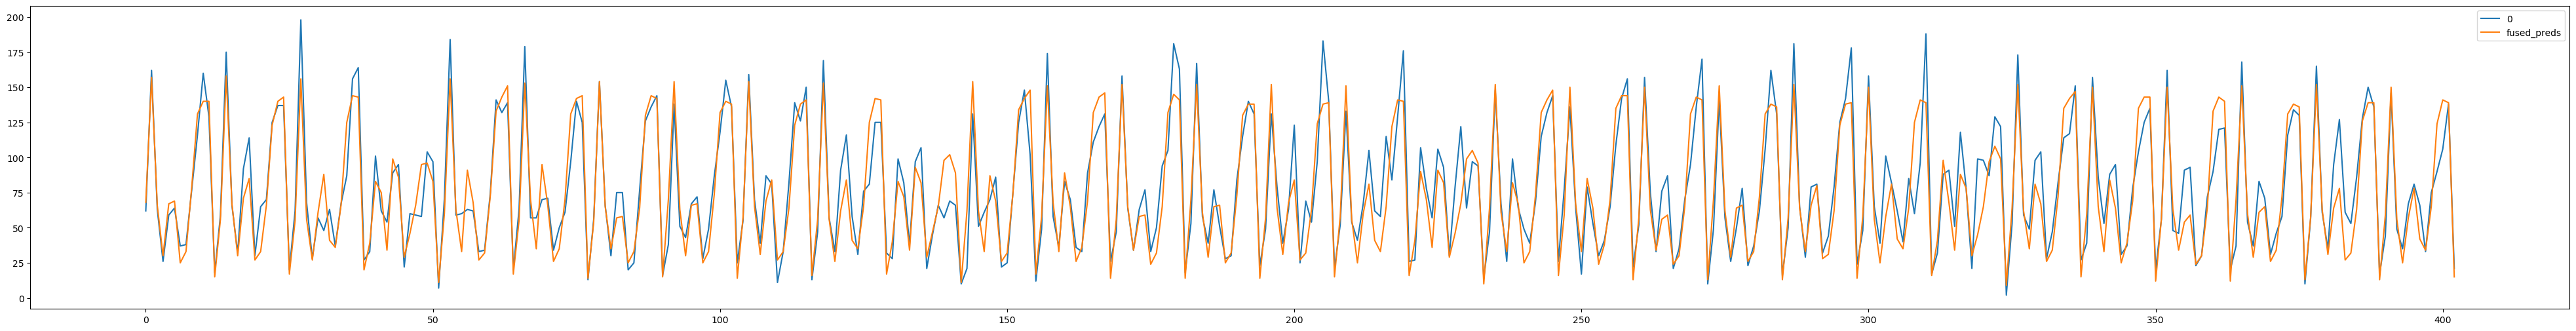

In [456]:
fusing.plot(kind = 'line',figsize =(50,6))

In [457]:
rmse = sqrt(mean_squared_error(fusing[0],fusing['fused_preds']))
print('rmse:',rmse)
#MAPE should be less than 10
mape = (1/len(fusing))*np.sum(np.abs((fusing[0]-fusing['fused_preds'])/fusing[0]))*100
print('mape:',mape)
wmape = np.sum((fusing[0]/np.sum(fusing[0]))*(np.abs((fusing[0]-fusing['fused_preds'])/fusing[0])))*100
print('wmape:',wmape)

rmse: 17.801845612071514
mape: 21.153240138485092
wmape: 17.16668780920969


In [420]:
#fuse_model.save('fused_model.h5')

In [453]:
fuse_model = load_model('fused_model.h5')
##mape = 21.15% epochs = 225, batch_size = 10,lstm 128,64,16 layers and output layer